In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib notebook

### Functions

In [2]:
def computeMomentArmAnkle(theta, Bs):
    # theta - ankle angle
    # Bs - coeficients for the polinomio
    
    auxBmultp = np.empty(Bs.shape);
    for i in range (len(Bs)):
        auxBmultp[i] = Bs[i] * (theta**i)
        
    Rf = sum(auxBmultp)
    
    return Rf   

In [3]:
def ComputeTotalLenghtSize(theta, As):
    # theta = ankle angle
    # As - coeficients for the polinomio
    
    auxAmultp = np.empty(As.shape);
    
    for i in range (len(As)):
        auxAmultp[i] = As[i] * (theta**i)
    
    Lm = sum(auxAmultp)
    
    return Lm

In [4]:
def tendonLength(Lm,Lce_o,Lnorm_ce, alpha):
    '''
    Compute tendon length
    
    Inputs:
        Lm = 
        Lce_o = optimal length of the fiber
        Lnorm_ce = normalized contractile element length
    
    Output:
        Lnorm_see = normalized tendon length   
    '''
    Lnorm_see = Lm/Lce_o - Lnorm_ce*np.cos(alpha)
    
    return Lnorm_see

In [5]:
def TendonForce (Lnorm_see,Lslack, Lce_o):
    '''
    Compute tendon force

    Inputs:
        Lnorm_see = normalized tendon length
        Lslack = slack length of the tendon (non-normalized)
        Lce_o = optimal length of the fiber
    
    Output:
        Fnorm_tendon = normalized tendon force
        
    '''
    Umax = .04
    
    if Lnorm_see < Lslack/Lce_o: 
        Fnorm_tendon = 0
    else: 
        Fnorm_tendon = ((Lnorm_see-Lslack/Lce_o)/(Umax*Lslack/Lce_o))**2
        
    return Fnorm_tendon

In [6]:
def ParallelElementForce (Lnorm_ce):
    '''
    Compute parallel element force
    
    Inputs:
        Lnorm_ce = normalized contractile element length
    
    Output:
        Fnorm_kpe = normalized parallel element force

    '''
    Umax = 1
    
    if Lnorm_ce< 1: 
        Fnorm_kpe = 0
    else: 
        Fnorm_kpe = ((Lnorm_ce-1)/(Umax*1))**2 
        
    return Fnorm_kpe

In [7]:
def ForceLengthCurve (Lnorm_ce,width):
    
    F0 = max([0, (1-((Lnorm_ce-1)/width)**2)])
    
    return F0

In [8]:
def ContractileElementDot(F0, Fnorm_CE, a):
    
    '''
    Compute Contractile Element Derivative

    Inputs:
        F0 = Force-Length Curve
        Fce = Contractile element force
    
    Output:
        Lnorm_cedot = normalized contractile element length derivative

    '''
    
    FMlen = 1.4 # young adults
    Vmax = 10  # young adults
    Af = 0.25  #force-velocity shape factor
    
    Fnorm_CE = min(FMlen*a*F0 - 0.001, Fnorm_CE)
    
    if  Fnorm_CE > a*F0:
        
        b = ((2 + 2/Af)*(a*F0*FMlen - Fnorm_CE))/(FMlen-1)
        
    elif Fnorm_CE <= a*F0:
        
        b = a*F0 + Fnorm_CE/Af
    
    Lnorm_cedot = (.25 + .75*a)*Vmax*((Fnorm_CE - a*F0)/b)
    
    return Lnorm_cedot

In [9]:
def ContractileElementForce(Fnorm_tendon,Fnorm_kpe, alpha):
    '''
    Compute Contractile Element force

    Inputs:
        Fnorm_tendon = normalized tendon force
        Fnorm_kpe = normalized parallel element force
    
    Output:
        Fnorm_CE = normalized contractile element force
    '''
    Fnorm_CE = Fnorm_tendon/np.cos(alpha) - Fnorm_kpe
    return Fnorm_CE

In [10]:
def activation(a,u,dt):
    '''
    Compute activation
    
    Inputs:
        u = idealized muscle excitation signal, 0 <= u <= 1
        a = muscular activation
        dt = time step
    
    Output:
        a = muscular activation  
    '''
    
    tau_deact = 50e-3 #young adults
    tau_act = 15e-3
    
    if u>a:
        tau_a = tau_act*(0.5+1.5*a)
    elif u <=a:
        tau_a = tau_deact/(0.5+1.5*a)
    
    #-------
    dadt = (u-a)/tau_a # euler
    
    a = a + dadt*dt
    #-------
    return a

In [11]:
def ComputeMomentJoint(Rf, Fnorm_tendon, Fmax,theta, theta_leg, m, g, Rcm):
    '''
    Inputs:
        RF = Moment arm
        Fnorm_tendon = Normalized tendon force
        m = Segment Mass
        g = Acelleration of gravity
        Fmax= maximal isometric force
    Output:
        M = Total moment with respect to joint
    '''
    Tm = Rf*Fnorm_tendon*Fmax
    
    MG = m*g*Rcm*np.sin(theta_leg - theta)
    
    M = Tm - MG
    
    return M

In [12]:
def ComputeAngularAcelerationJoint(M, I):
    '''
    Inputs:
        M = Total moment with respect to joint
        I = Moment of Inertia
    Output:
        thetadd= angular aceleration of the joint
    '''
    thetadd = M/I
    return thetadd

### General Purpose

For dorsiflexors muscle, obtain the ankle angle  
$\theta_{perna} - \theta$  

### Lembretes  

Para comprimento do músculo+tendão, usar o polinômio de 4ª ordem em que entram os A's de um artigo lá

Tomar cuidado que há coisas na tabela que estão em graus mas nos cálculos usamos radianos  

*Rf* é mx no artigo que ele mencionou  
. $B_{x}$ retirar de uma tabela que tem no artigo  

$L_{ce} = L_{0}^{M}$  

$L_{slack} = L_{s}^{T} \cdot L_{0}^{M} $

  
$M = T_{M} - M_{G}$  

tal que $T_{M} = F_{M} \cdot R_{f}$

$R_{CM} = $  

$R_{f}(\theta)$ é um polinômio de 4ª ordem que no artigo é chamado de $m_{x}$


$\theta_{A}$ é o ângulo do tornozelo

$T_{A}$ é o torque resultante no tornozelo

In [13]:
g = 9.81# acceleration of gravity

### Subject's Foot caracteristics   
Parameters obtained experimentally or from Winter's book's tables.

In [14]:
Lfoot = 0.26 # [m]
m     = 75 # [kg]

mtable     = 0.0145
Rcmtable   = 0.5
Rgirotable = 0.69

mfoot      = mtable * m

Rcmfoot    = Rcmtable * Lfoot

Rgirofoot  = Rgirotable * Lfoot
Ifoot      = mfoot * (Rgirofoot**2)


Rcm  = Rcmfoot
I    = Ifoot

### Muscle Properties  

Parameters obtained from Table 2 of Thelen (2003).

In [15]:
Umax    = .04         #  SEE strain at Fmax
width   = .63         #  *Lce_o

Parameters from Nigg & Herzog (2006).

In [16]:
Lce_o   = .090        
Lslack  = 2.4 * Lce_o   #  sack length of SEE
Fmax    = 1400          # maximal isometric force for dorsiflexors
alpha   = 7*np.pi/180   # penation angle

Activation dynamics parameters

In [17]:
a  = 1 #inital conditional for ativation
u  = 1 #Initial conditional for Brain's activation

#b = .25*10#*Lce_o

### Initial conditions

In [18]:
theta     = 0          # start as 0 degree of flexion

thetad    = 0          # zero velocity

theta_leg = np.pi/2    # the leg angle in relation to the ground

Lm0  = 0.306    # initial total lenght of the muscle  -- isso é o TA de um dos artigos que eles mostraram
Lm   = 0.310     # initial total lenght of the muscle

Lnorm_ce = .087/Lce_o  # ((Lm0 - Lslack)/np.cos(alpha))/Lce_o #norm

t0 = 0 #Initial time
tf = 1 #Final Time

h = 1e-4 #integration step size and step counter

#### Coefficients for the model

In [19]:
# Coefs for total muscle+tendon length

As = np.array([30.6, -7.44e-2, -1.41e-4, 2.42e-6, 1.5e-8]) / 100   # at [m] instead of [cm]


# Coefs for moment arm for ankle angle

Bs = np.array([4.3, 1.66e-2, -3.89e-4, -4.45e-6, -4.34e-8]) / 100  # at [m] instead of [cm]


In [20]:
t = np.arange(t0,tf,h)

F = np.empty(t.shape)

thetavec=np.empty(t.shape)

Fkpe = np.empty(t.shape)

FiberLen = np.empty(t.shape)

TendonLen = np.empty(t.shape)

a_dynamics = np.empty(t.shape)

FiberVelocity = np.empty(t.shape)

In [21]:
#Normalizing

for i in range (len(t)):
    
    # Compute tendo+muscle length
    Lm =  ComputeTotalLenghtSize(theta*180/math.pi, As)
    
    # Compute the tendon length
    Lnorm_see = tendonLength(Lm,Lce_o,Lnorm_ce, alpha)
    
    # compute the force in the tendon
    Fnorm_tendon = TendonForce (Lnorm_see,Lslack, Lce_o) 
    
    # compute the force in the parallel element
    Fnorm_kpe = ParallelElementForce (Lnorm_ce)     
        
    #isometric force at Lce from CE force length relationship
    F0 = ForceLengthCurve (Lnorm_ce, width)
    
    Fnorm_CE = ContractileElementForce(Fnorm_tendon, Fnorm_kpe, alpha) #Fnorm_CE = ~Fm
    
    #computing activation
    a = activation(a,u,h)
    
    #calculate CE velocity from Hill's equation    
    Lnorm_cedot = ContractileElementDot(F0, Fnorm_CE, a)
    
    #Compute MomentJoint
    Rf = computeMomentArmAnkle(theta*180/math.pi, Bs) 
    M  = ComputeMomentJoint(Rf, Fnorm_tendon, Fmax, theta, theta_leg, mfoot, g, Rcmfoot)
    
    #Compute Angular Aceleration Joint
    thetadd = ComputeAngularAcelerationJoint (M,I)
    
    # Euler integration steps
    Lnorm_ce = Lnorm_ce + h*Lnorm_cedot
    
    thetad = thetad + h*thetadd
    theta  = theta  + h*thetad


    # # STORE variables in vectors
    F[i] = Fnorm_tendon * Fmax
    
    Fkpe[i] = Fnorm_kpe * Fmax
    
    FiberLen[i] = Lnorm_ce * Lce_o
    
    TendonLen[i] = Lnorm_see*Lce_o
    
    a_dynamics[i] = a
    
    thetavec[i] = theta
    
    FiberVelocity[i] = Lnorm_cedot * Lce_o
    

Text(0,0.5,'a-values during the simulation')

<Figure size 432x288 with 0 Axes>

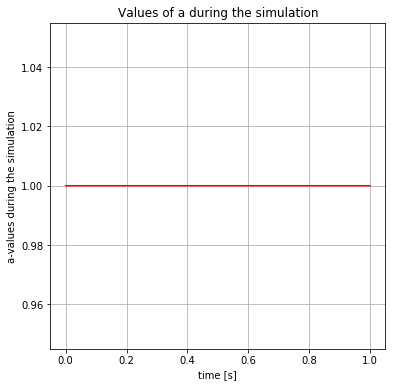

In [22]:
plt.figure()
fig, ax = plt.subplots(1,1, figsize = (6,6),sharex=True)

ax.plot(t,a_dynamics,c='red')
ax.set_title('Values of a during the simulation')
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('a-values during the simulation')

Text(0,0.5,'Force (N)')

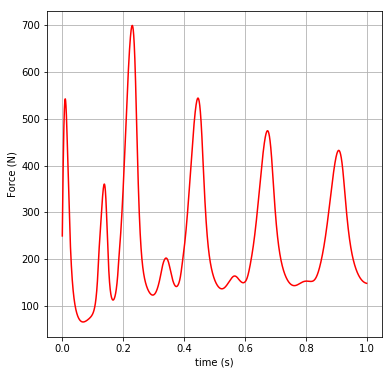

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,F,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force (N)')

Text(0,0.5,'Ankle Joint Angle (°)')

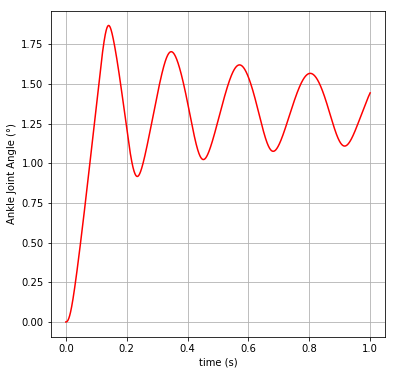

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,thetavec,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Ankle Joint Angle (°)')

Text(0,0.5,'Velocity of fiber')

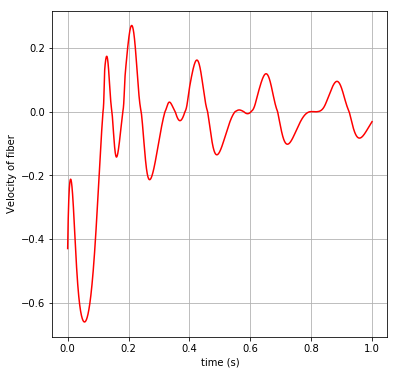

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,FiberVelocity,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Velocity of fiber')

Text(0,0.5,'Length [m]')

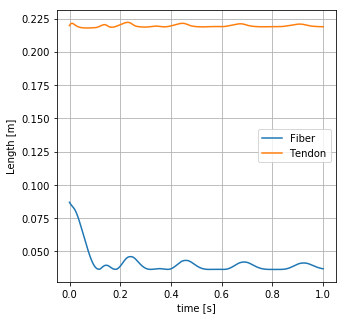

In [26]:
fig, ax = plt.subplots(1,1,figsize=(5,5),sharex=True)

ax.plot(t, FiberLen, label = 'Fiber')
ax.plot(t, TendonLen, label = 'Tendon')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('time [s]')
plt.ylabel('Length [m]')